In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pqm import pqm_chi2, pqm_pvalue
from scipy.stats import norm, chi2, uniform, kstest

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

Create a distribution, and sample from it twice

In [2]:
class TimeSeriesModel:
    def __init__(self, a = 0., sigma=1., nt=100):
        self.t = np.linspace(0, 10, nt)
        self.a = a
        self.sigma = sigma
        
    def generate_samples(self, num_samples):
        # Generate samples from each component
        y = self.a * np.cos(self.t) + self.sigma * np.random.randn(num_samples, len(self.t))
        return y


In [3]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
chisqs_mean = np.zeros_like(amps)
chisqs_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    zs = []
    dof_array = []
    for _ in range(num_repeats):
        z, dof = pqm_chi2(y_samples, null_samples)
        zs.append(z)
        dof_array.append(dof)
        
    chisqs_mean[i] = np.mean(zs)
    chisqs_std[i] = np.std(zs)
    print(a, chisqs_mean[i], chisqs_std[i], np.unique(dof_array))

0.01 103.1555105864614 13.775441347698994 [99]
0.012742749857031334 99.77291134222222 10.876876318204417 [99]
0.016237767391887217 103.83720075164533 13.946939634707347 [99]
0.0206913808111479 101.74956031906154 13.787510750211355 [99]
0.026366508987303583 110.0941929393274 18.409380672477916 [99]
0.03359818286283781 111.23509573513702 9.858650228883066 [99]
0.04281332398719394 109.82103740446306 13.328585910384001 [99]
0.0545559478116852 119.583395192361 14.878099225901126 [99]
0.06951927961775606 137.0605567448162 19.535642014853902 [99]
0.08858667904100823 145.35371777467284 17.73676577689004 [99]
0.11288378916846889 174.7742562637114 28.810395814140858 [99]
0.14384498882876628 249.34168285821517 29.082014230346086 [99]
0.18329807108324356 329.65589790230246 47.878134512035956 [99]
0.23357214690901212 392.4685087711847 70.44778075712027 [99]
0.29763514416313175 620.4972889303839 153.11163874443199 [99]
0.37926901907322497 908.297568078124 182.99166667869042 [99]


/Users/sammysharief/anaconda3/envs/tarp_project/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0.4832930238571752 inf nan [99]
0.615848211066026 inf nan [99]
0.7847599703514611 inf nan [99]
1.0 inf nan [99]


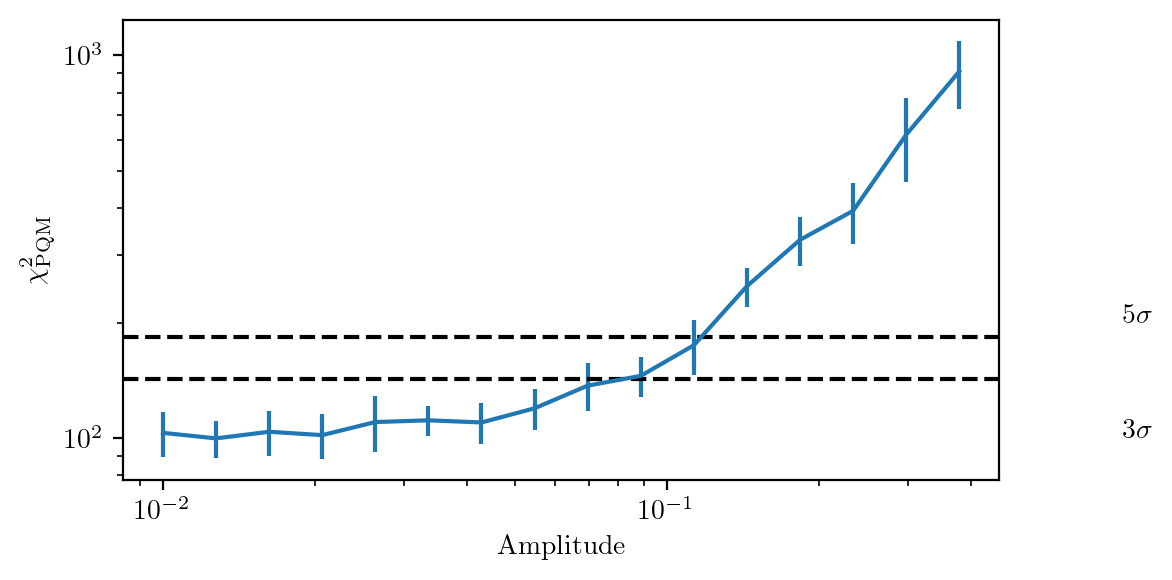

In [4]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.errorbar(amps, chisqs_mean, yerr=chisqs_std)
ax.axhline(chi2.ppf(0.997300203936740, 99), ls='--', color='k')
ax.axhline(chi2.ppf(0.999999426696856, 99), ls='--', color='k')
ax.text(0.8, 100, r'$3 \sigma$')
ax.text(0.8, 200, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('$\chi^2_{\mathrm{ PQM}}$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
plt.show()

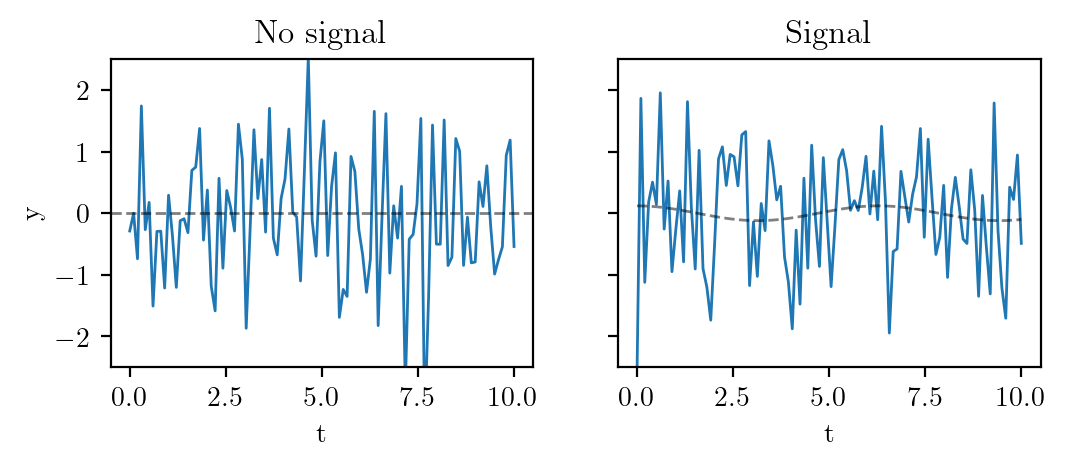

In [5]:
gmm = TimeSeriesModel(a = 0.12)
gmm_null = TimeSeriesModel(a = 0)
x_samples = gmm.generate_samples(num_samples=2)
null_samples = gmm_null.generate_samples(num_samples=2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(6, 2), sharex=True, sharey=True)
axs[0].plot(gmm.t, null_samples[0], lw=1)
axs[0].axhline(0, color='k', lw=1, ls='--', alpha=0.5)
axs[0].set_ylim([-2.5, 2.5])
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].set_title('No signal')

axs[1].plot(gmm.t, x_samples[0], lw=1)
axs[1].plot(gmm.t, gmm.a * np.cos(gmm.t), color='k', lw=1, ls='--', alpha=0.5)
axs[1].set_ylim([-2.5, 2.5])
axs[1].set_title('Signal')
axs[1].set_xlabel('t')

plt.show()

# Using p-value

In [6]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
p_val_mean = np.zeros_like(amps)
p_val_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    p_val = []
    for _ in range(num_repeats):
        pval = pqm_pvalue(y_samples, null_samples)
        p_val.append(pval)
    if np.mean(p_val) > 0.01:
        print("Do not reject the null hypothesis")
    else:
        print("Reject the null hypothesis")
    p_val_mean[i] = np.mean(p_val)
    p_val_std[i] = np.std(p_val)
    print(a, np.mean(p_val), np.std(p_val))

Do not reject the null hypothesis
0.01 0.5074087525125897 0.29141959213685587
Do not reject the null hypothesis
0.012742749857031334 0.5951376874727418 0.27745620234775825
Do not reject the null hypothesis
0.016237767391887217 0.48388563845888244 0.28611309379000877
Do not reject the null hypothesis
0.0206913808111479 0.47831592723296384 0.25903604895163224
Do not reject the null hypothesis
0.026366508987303583 0.5110176444029721 0.2484556793248124
Do not reject the null hypothesis
0.03359818286283781 0.31749426047158436 0.23383313448948442
Do not reject the null hypothesis
0.04281332398719394 0.2446429571038055 0.20993147271099075
Do not reject the null hypothesis
0.0545559478116852 0.35209830482839943 0.2809485256877297
Do not reject the null hypothesis
0.06951927961775606 0.06711477755401496 0.12451289313082628
Do not reject the null hypothesis
0.08858667904100823 0.018320036310496998 0.04022583726095049
Reject the null hypothesis
0.11288378916846889 0.00045317232565386336 0.0019390

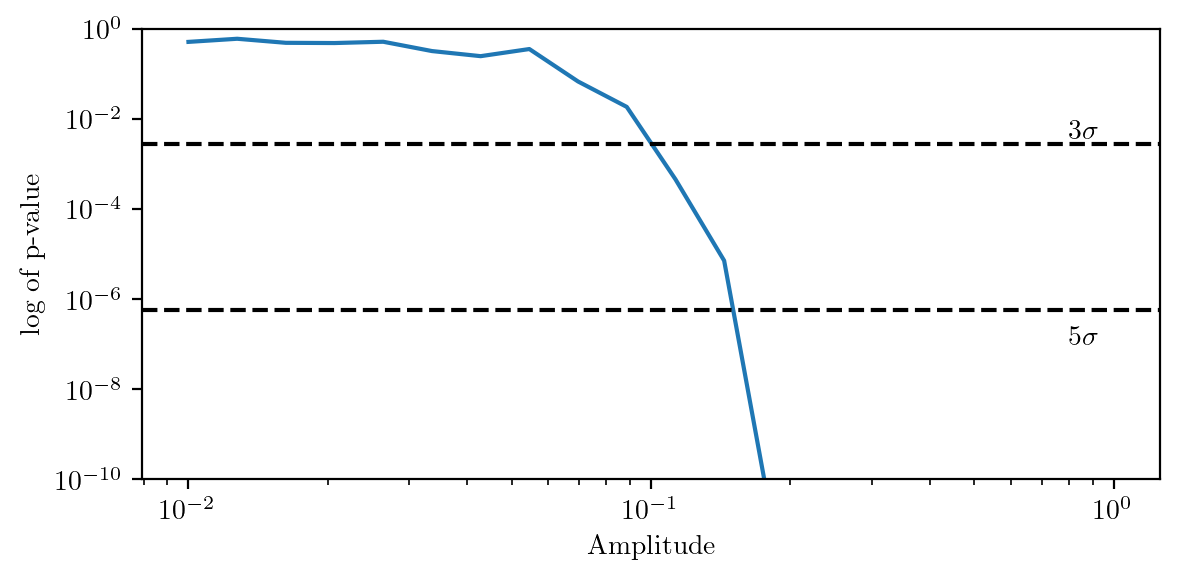

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(amps, p_val_mean)
ax.axhline(1 - 0.997300203936740, ls='--', color='k')  # 3 sigma equivalent p-value
ax.axhline(1 - 0.999999426696856, ls='--', color='k')  # 5 sigma equivalent p-value
ax.text(0.8, 0.01, r'$3 \sigma$', verticalalignment='top')
ax.text(0.8, 0.0000001, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('log of p-value')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-10, 1)  # Set the y-axis limits
plt.tight_layout()
plt.show()
